# L2: Normalizing the Content

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>


In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import JSON

import json

from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.html import partition_html
from unstructured.partition.pptx import partition_pptx
from unstructured.staging.base import dict_to_elements, elements_to_json

In [3]:
from Utils import Utils
utils = Utils()

DLAI_API_KEY = utils.get_dlai_api_key()
DLAI_API_URL = utils.get_dlai_url()

s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access Utils File and Helper Functions:</b> To access helper functions and other related files for this notebook, 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>


## Example Document: Medium Blog HTML Page

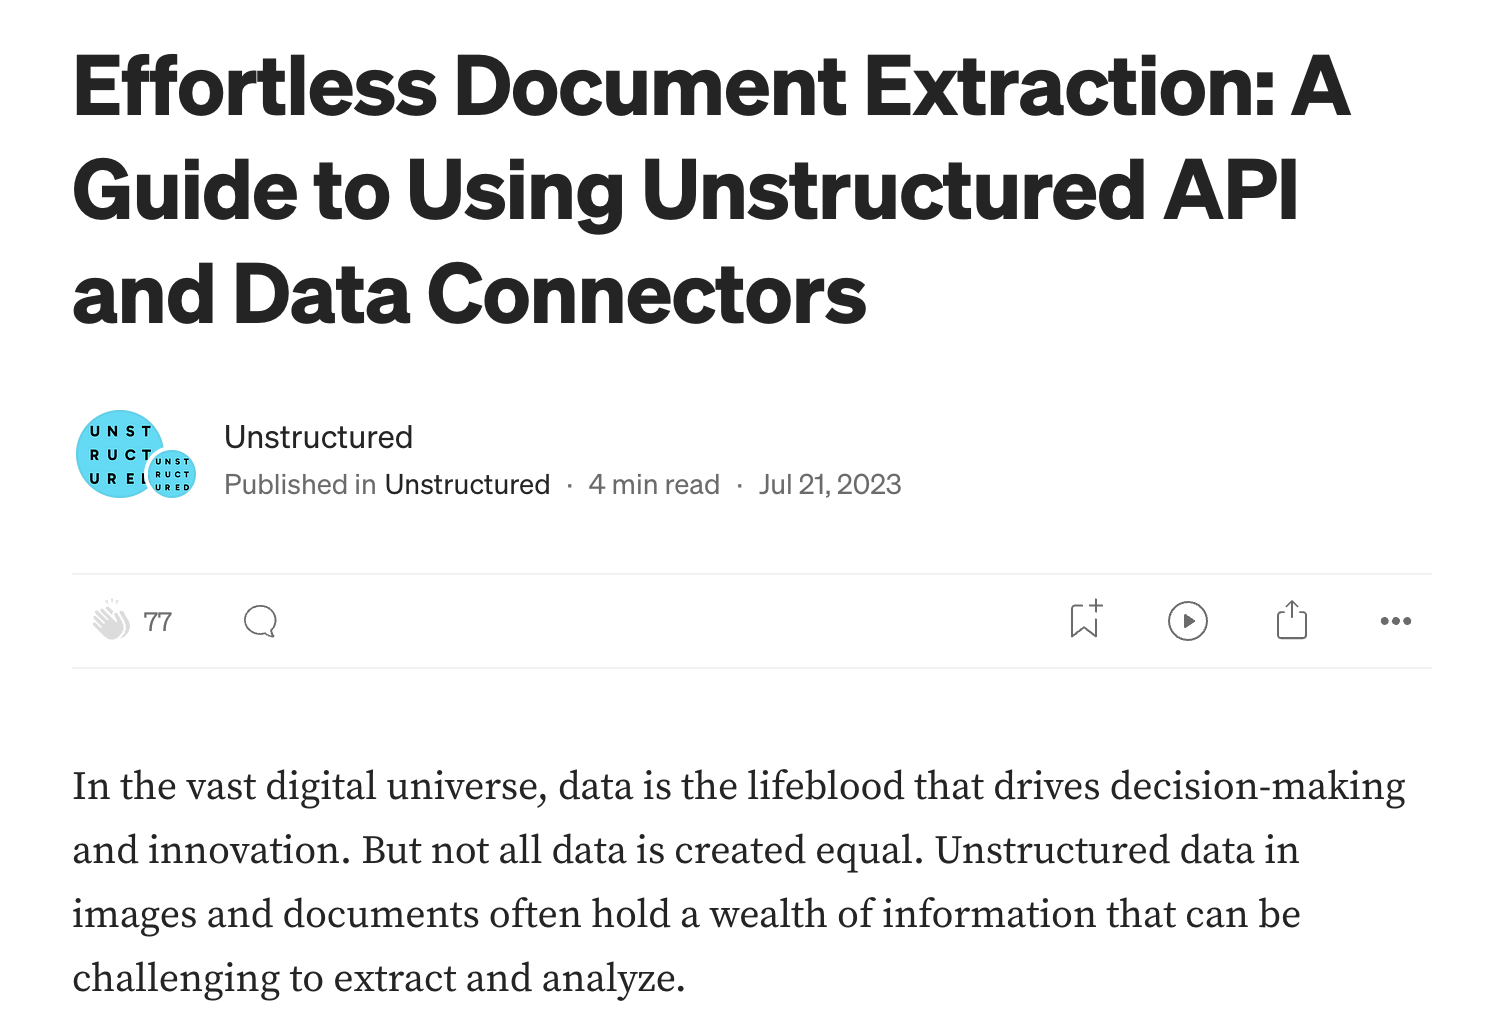

In [4]:
from IPython.display import Image
Image(filename="images/HTML_demo.png", height=600, width=600)

In [5]:
filename = "example_files/medium_blog.html"
elements = partition_html(filename=filename)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
elements

In [ ]:
element_dict = [el.to_dict() for el in elements]
example_output = json.dumps(element_dict[11:15], indent=2)
print(example_output)

In [7]:
element_dict = [el.to_dict() for el in elements]
example_output = json.dumps(element_dict[:], indent=2)
print(example_output)

[
  {
    "type": "Title",
    "element_id": "7100b12091b2d2bea5e2d50c46ba4438",
    "text": "Open in app",
    "metadata": {
      "category_depth": 0,
      "last_modified": "2024-07-09T12:56:49",
      "link_texts": [
        "Open in app"
      ],
      "link_urls": [
        "https://rsci.app.link/?%24canonical_url=https%3A%2F%2Fmedium.com%2Fp%2F6c2659eda4af&%7Efeature=LoOpenInAppButton&%7Echannel=ShowPostUnderCollection&source=---two_column_layout_nav----------------------------------"
      ],
      "page_number": 1,
      "languages": [
        "eng"
      ],
      "file_directory": "example_files",
      "filename": "medium_blog.html",
      "filetype": "text/html"
    }
  },
  {
    "type": "Title",
    "element_id": "5e2b8e96503d722e7ebf61b9bc3e9988",
    "text": "Sign up",
    "metadata": {
      "category_depth": 0,
      "last_modified": "2024-07-09T12:56:49",
      "emphasized_text_contents": [
        "Sign up"
      ],
      "emphasized_text_tags": [
        "span"
   

In [8]:
JSON(example_output)

<IPython.core.display.JSON object>

## Example Doc: MSFT PowerPoint on OpenAI

In [ ]:
Image(filename="images/pptx_slide.png", height=600, width=600) 

In [ ]:
filename = "example_files/msft_openai.pptx"
elements = partition_pptx(filename=filename)

In [ ]:
element_dict = [el.to_dict() for el in elements]
JSON(json.dumps(element_dict[:], indent=2))

## Example Document: PDF on Chain-of-Thought

In [ ]:
Image(filename="images/cot_paper.png", height=600, width=600) 

In [ ]:
filename = "example_files/CoT.pdf"
with open(filename, "rb") as f:
    files=shared.Files(
        content=f.read(), 
        file_name=filename,
    )

req = shared.PartitionParameters(
    files=files,
    strategy='hi_res',
    pdf_infer_table_structure=True,
    languages=["eng"],
)
try:
    resp = s.general.partition(req)
    print(json.dumps(resp.elements[:3], indent=2))
except SDKError as e:
    print(e)

In [ ]:
JSON(json.dumps(resp.elements, indent=2))

## Work With Your Own Files

In [ ]:
import panel as pn
#import param
from Utils import upld_file
pn.extension()

In [ ]:
upld_widget = upld_file()
pn.Row(upld_widget.widget_file_upload)

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> 🖥 &nbsp; <b>Note:</b> If the file upload interface isn't functioning properly, the issue may be related to your browser version. In such a case, please ensure your browser is updated to the latest version, or try using a different browser.</p>


In [ ]:
!ls ./example_files

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Uploading Your Own File - Method 2:</b> To upload your own files, you can also 1) click on the <em>"View"</em> option on the top menu of the notebook and then 2) click on <em>"File Browser"</em>. Then 3) click on <em>"Upload"</em> button to upload your files. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>